In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Importing project 1 to retrieve X and y
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.y

# Project 2
# REGRESSION PART A (1)

In [18]:
#making sure data is standardized
print("Means of X columns", np.mean(X, axis=0))
print("SDs of X columns", np.std(X, axis=0))

Means of X columns [ 2.44487823e-16  1.45428102e-16 -1.33836007e-16 -8.11446654e-17
 -3.99690168e-15  9.69520678e-17  2.78210281e-16 -8.43061459e-17
 -2.00227096e-16]
SDs of X columns [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
#REGRESSION PART A (1) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train)) 
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

#printing weights
#print(model.coef_)


Train RMSE: 1214.5743570244688
Test RMSE: 1224.5965418579501
Train R^2 Score: 0.907335736316707
Test R^2 Score: 0.9056643685073519


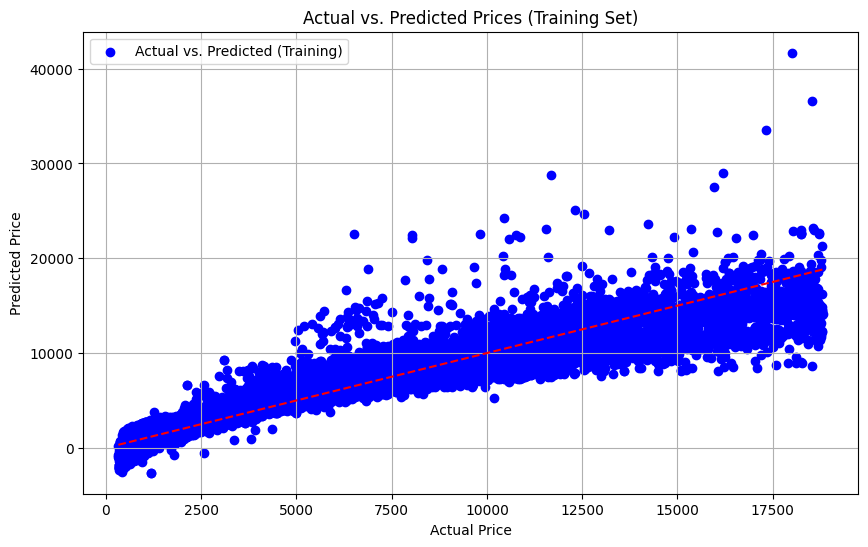

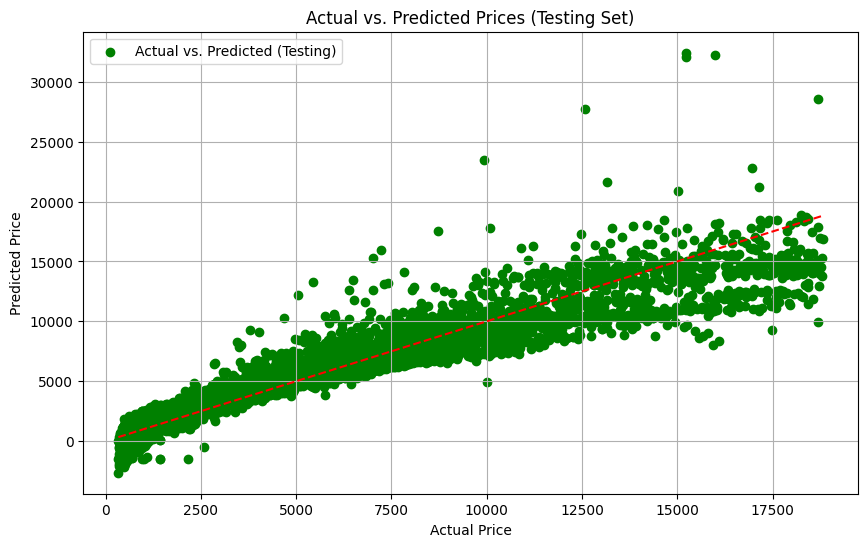

In [20]:
# Scatter plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Testing Set)')
plt.legend()
plt.grid(True)
plt.show()

## REGRESSION PART A (2)

In [21]:
#defining methods to calculate test and train error 

def test_error(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    test_error = (sum([(abs(y_pred - y_true)) for y_pred, y_true in zip(y_pred_test, y_test)])) / len(y_test)
    return test_error

def train_error(model, X_train, y_train):
    y_pred_train = model.predict(X_train)
    train_error = (sum([(abs(y_pred - y_true)) for y_pred, y_true in zip(y_pred_train, y_train)])) / len(y_train)
    return train_error

In [22]:
#introducing a regularization parameter lambda, estimating generalization error and calculating test error

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=10)

lambda_values = [0, 0.00001, 0.1 , 1,10,20,30,100]
lambda_gen_errors = {}
lambda_train_errors = {}

for lmbda in lambda_values:
    lambda_gen_errors[lmbda] = []
    lambda_train_errors[lmbda] = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    for lmbda in lambda_values:
        model = Ridge(alpha=lmbda)
        model.fit(X_train, y_train)
        lambda_gen_errors[lmbda].append(test_error(model, X_test, y_test))
        lambda_train_errors[lmbda].append(train_error(model, X_train, y_train))

lambda_error_list = [(lmbda, sum(lambda_gen_errors[lmbda]) / 10) for lmbda in lambda_values]
lambda_train_error_list = [(lmbda, sum(lambda_train_errors[lmbda]) / 10) for lmbda in lambda_values]

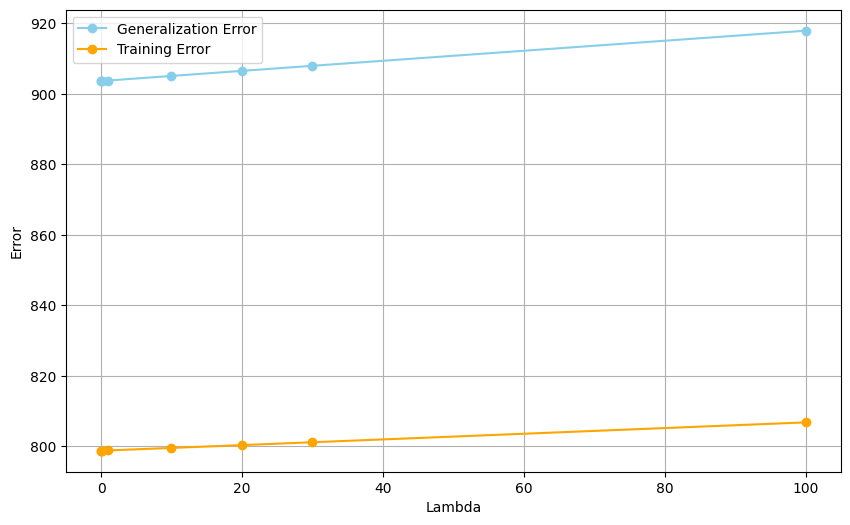

In [23]:
#plotting generalization error (and test error) as a function of lambda

lambda_values_plot, errors = zip(*lambda_error_list)
_, train_errors = zip(*lambda_train_error_list)

# Plot lambda values vs generalization errors
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_plot, errors, 'o-', label='Generalization Error', color='skyblue')

# Plot lambda values vs training errors
plt.plot(lambda_values_plot, train_errors, 'o-', label='Training Error', color='orange')

plt.xlabel('Lambda')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# REGRESSION PART A (3)

# REGRESSION PART B (1)

First, we need to build an artificial neural network

In [27]:
#REGRESSION PART B (1)

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the number of folds for both levels of cross-validation
K1 = K2 = 10

# Define the range of complexity-controlling parameters
h_values = [1, 5, 10, 20]  # Example range for the number of hidden units in the ANN
lambda_values = [0.001, 0.01, 0.1, 1, 10]  # Example range for λ in regularized linear regression

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K1, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K2, shuffle=True, random_state=42)

# Initialize lists to store the performance of each model
baseline_scores = []
ridge_scores = []
ann_scores = []

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X):
    # Split the data into training and test sets for the outer loop
    X_outer_train, X_outer_test = X[train_index], X[test_index]
    y_outer_train, y_outer_test = y[train_index], y[test_index]
    
    # If y is a pandas Series, reset the index
    if isinstance(y_outer_train, pd.Series):
        y_outer_train = y_outer_train.reset_index(drop=True)
    if isinstance(y_outer_test, pd.Series):
        y_outer_test = y_outer_test.reset_index(drop=True)
    
    # Initialize dictionaries to store the sum of scores for each hyperparameter setting
    ridge_scores_sum = {lmbda: 0 for lmbda in lambda_values}
    ann_scores_sum = {h: 0 for h in h_values}
    
    # Inner cross-validation loop (model selection and hyperparameter tuning)
    for inner_train_index, inner_val_index in inner_cv.split(X_outer_train):
        # Split the data into training and validation sets for the inner loop
        X_inner_train, X_inner_val = X_outer_train[inner_train_index], X_outer_train[inner_val_index]
        y_inner_train, y_inner_val = y_outer_train[inner_train_index], y_outer_train[inner_val_index]
        
        # Standardize features
        scaler = StandardScaler()
        X_inner_train_scaled = scaler.fit_transform(X_inner_train)
        X_inner_val_scaled = scaler.transform(X_inner_val)
        
        # Train regularized linear regression models with different λ values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_inner_train_scaled, y_inner_train)
            y_ridge_pred = ridge_model.predict(X_inner_val_scaled)
            ridge_scores_sum[lmbda] += mean_squared_error(y_inner_val, y_ridge_pred)
        
        # Train ANN models with different numbers of hidden units on the inner training set
        for h in h_values:
            # Adjusted ANN model with specified parameters
            ann_model = MLPRegressor(
                hidden_layer_sizes=(h,),
                max_iter=1000,  # Increase the number of iterations
                learning_rate_init=0.001,  # Adjust the learning rate
                solver='adam',  # Try different solvers
                early_stopping=True,  # Enable early stopping
                random_state=42
            )
            ann_model.fit(X_inner_train_scaled, y_inner_train)
            y_ann_pred = ann_model.predict(X_inner_val_scaled)
            ann_scores_sum[h] += mean_squared_error(y_inner_val, y_ann_pred)
    
    # Select the best hyperparameters based on the inner fold scores
    best_lambda = min(ridge_scores_sum, key=ridge_scores_sum.get)
    best_h = min(ann_scores_sum, key=ann_scores_sum.get)
    
    # Train the models with the best hyperparameters on the outer training set and evaluate on the outer test set
    # Standardize features
    scaler = StandardScaler()
    X_outer_train_scaled = scaler.fit_transform(X_outer_train)
    X_outer_test_scaled = scaler.transform(X_outer_test)
    
    # Baseline
    baseline_model = DummyRegressor(strategy='mean')
    baseline_model.fit(X_outer_train, y_outer_train)
    y_baseline_pred = baseline_model.predict(X_outer_test)
    baseline_scores.append(mean_squared_error(y_outer_test, y_baseline_pred))
    
    # Regularized linear regression with the best λ value
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_outer_train_scaled, y_outer_train)
    y_ridge_pred = ridge_model.predict(X_outer_test_scaled)
    ridge_scores.append(mean_squared_error(y_outer_test, y_ridge_pred))
    
    # ANN with the best number of hidden units
    ann_model = MLPRegressor(
        hidden_layer_sizes=(best_h,),
        max_iter=1000,  # Increase the number of iterations
        learning_rate_init=0.001,  # Adjust the learning rate
        solver='adam',  # Try different solvers
        early_stopping=True,  # Enable early stopping
        random_state=42
    )
    ann_model.fit(X_outer_train_scaled, y_outer_train)
    y_ann_pred = ann_model.predict(X_outer_test_scaled)
    ann_scores.append(mean_squared_error(y_outer_test, y_ann_pred))

# Calculate the average performance across all outer folds
avg_baseline_score = np.mean(baseline_scores)
avg_ridge_score = np.mean(ridge_scores)
avg_ann_score = np.mean(ann_scores)

# Compare the models
print("Baseline Model Average MSE:", avg_baseline_score)
print("Regularized Linear Regression Average MSE:", avg_ridge_score)
print("Artificial Neural Network Average MSE:", avg_ann_score)


Baseline Model Average MSE: 15916386.683994746
Regularized Linear Regression Average MSE: 1483613.4607027385
Artificial Neural Network Average MSE: 772116.6648143549


# REGRESSION PART B (2)

In [29]:
#REGRESSION PART B (2)

# Define the number of folds for both levels of cross-validation
K1 = K2 = 10

# Define the range of complexity-controlling parameters
h_values = [3, 4]  # Example range for the number of hidden units in the ANN
lambda_values = [0.01, 0.05]  # Example range for λ in regularized linear regression

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K1, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K2, shuffle=True, random_state=42)

# Initialize lists to store the results for each outer fold
results = []

# Outer cross-validation loop
for i, (train_index, test_index) in enumerate(outer_cv.split(X)):
    # Split the data into training and test sets for the outer loop
    X_outer_train, X_outer_test = X[train_index], X[test_index]
    y_outer_train, y_outer_test = y[train_index], y[test_index]
    
    # If y is a pandas Series, reset the index
    if isinstance(y_outer_train, pd.Series):
        y_outer_train = y_outer_train.reset_index(drop=True)
    if isinstance(y_outer_test, pd.Series):
        y_outer_test = y_outer_test.reset_index(drop=True)
    
    # Initialize dictionaries to store the sum of scores for each hyperparameter setting
    ridge_scores_sum = {lmbda: 0 for lmbda in lambda_values}
    ann_scores_sum = {h: 0 for h in h_values}
    
    # Inner cross-validation loop (model selection and hyperparameter tuning)
    for inner_train_index, inner_val_index in inner_cv.split(X_outer_train):
        # Split the data into training and validation sets for the inner loop
        X_inner_train, X_inner_val = X_outer_train[inner_train_index], X_outer_train[inner_val_index]
        y_inner_train, y_inner_val = y_outer_train[inner_train_index], y_outer_train[inner_val_index]
        
        # Standardize features
        scaler = StandardScaler()
        X_inner_train_scaled = scaler.fit_transform(X_inner_train)
        X_inner_val_scaled = scaler.transform(X_inner_val)
        
        # Train regularized linear regression models with different λ values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_inner_train_scaled, y_inner_train)
            y_ridge_pred = ridge_model.predict(X_inner_val_scaled)
            ridge_scores_sum[lmbda] += mean_squared_error(y_inner_val, y_ridge_pred)
            
            # Train ANN models with different numbers of hidden units on the inner training set
for h in h_values:
    ann_model = MLPRegressor(
        hidden_layer_sizes=(h,),
        max_iter=2000,  # Increase the number of iterations
        learning_rate_init=0.001,  # Adjust the learning rate
        solver='adam',  # Try different solvers
        early_stopping=True,  # Enable early stopping
        random_state=42,
        verbose=True  # Enable verbose mode to monitor convergence
    )
    ann_model.fit(X_inner_train_scaled, y_inner_train)  # Training the model

    # Check if the optimization converged
    if not ann_model.n_iter_ == 2000:
        print("Warning: The optimization may not have converged.")

    y_ann_pred = ann_model.predict(X_inner_val_scaled)
    ann_scores_sum[h] += mean_squared_error(y_inner_val, y_ann_pred)
    
    # Select the best hyperparameters based on the inner fold scores
    best_lambda = min(ridge_scores_sum, key=ridge_scores_sum.get)
    best_h = min(ann_scores_sum, key=ann_scores_sum.get)
    
    # Train the models with the best hyperparameters on the outer training set and evaluate on the outer test set
    # Standardize features
    scaler = StandardScaler()
    X_outer_train_scaled = scaler.fit_transform(X_outer_train)
    X_outer_test_scaled = scaler.transform(X_outer_test)
    
    # Baseline
    baseline_model = DummyRegressor(strategy='mean')
    baseline_model.fit(X_outer_train, y_outer_train)
    y_baseline_pred = baseline_model.predict(X_outer_test)
    baseline_test_error = mean_squared_error(y_outer_test, y_baseline_pred)
    
    # Regularized linear regression with the best λ value
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_outer_train_scaled, y_outer_train)
    y_ridge_pred = ridge_model.predict(X_outer_test_scaled)
    ridge_test_error = mean_squared_error(y_outer_test, y_ridge_pred)
    
    # ANN with the best number of hidden units
    ann_model = MLPRegressor(
        hidden_layer_sizes=(best_h,),
        max_iter=1000,  # Increase the number of iterations
        learning_rate_init=0.001,  # Adjust the learning rate
        solver='adam',  # Try different solvers
        early_stopping=True,  # Enable early stopping
        random_state=42
    )
    ann_model.fit(X_outer_train_scaled, y_outer_train)
    y_ann_pred = ann_model.predict(X_outer_test_scaled)
    ann_test_error = mean_squared_error(y_outer_test, y_ann_pred)
    
    # Store the results for this fold
    results.append({
        'Fold': i + 1,
        'Optimal h': best_h,
        'ANN Test Error': ann_test_error,
        'Optimal λ': best_lambda,
        'Ridge Test Error': ridge_test_error,
        'Baseline Test Error': baseline_test_error
    })

# Convert the results to a pandas DataFrame for easy table creation
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)

Iteration 1, loss = 15568425.96280628
Validation score: -0.989561
Iteration 2, loss = 15563383.95561119
Validation score: -0.988704
Iteration 3, loss = 15554438.07957277
Validation score: -0.987251
Iteration 4, loss = 15541095.98348587
Validation score: -0.985280
Iteration 5, loss = 15523919.30790785
Validation score: -0.982842
Iteration 6, loss = 15503164.85988335
Validation score: -0.979964
Iteration 7, loss = 15479148.75453664
Validation score: -0.976684
Iteration 8, loss = 15452134.24081721
Validation score: -0.973037
Iteration 9, loss = 15422237.00796021
Validation score: -0.969028
Iteration 10, loss = 15389628.98003523
Validation score: -0.964683
Iteration 11, loss = 15354525.83045110
Validation score: -0.960025
Iteration 12, loss = 15317075.37163886
Validation score: -0.955075
Iteration 13, loss = 15277327.44861003
Validation score: -0.949828
Iteration 14, loss = 15235309.69353645
Validation score: -0.944308
Iteration 15, loss = 15191201.96788388
Validation score: -0.938535
Iter

Iteration 129, loss = 4758564.23050786
Validation score: 0.402227
Iteration 130, loss = 4680124.51017383
Validation score: 0.412238
Iteration 131, loss = 4602619.25473662
Validation score: 0.422123
Iteration 132, loss = 4526092.94300128
Validation score: 0.431863
Iteration 133, loss = 4450516.16879547
Validation score: 0.441516
Iteration 134, loss = 4375870.53664775
Validation score: 0.451006
Iteration 135, loss = 4302147.10100891
Validation score: 0.460386
Iteration 136, loss = 4229450.90073855
Validation score: 0.469664
Iteration 137, loss = 4157739.44283682
Validation score: 0.478775
Iteration 138, loss = 4086924.67239315
Validation score: 0.487808
Iteration 139, loss = 4017096.14645251
Validation score: 0.496710
Iteration 140, loss = 3948418.53218572
Validation score: 0.505445
Iteration 141, loss = 3880781.14070785
Validation score: 0.514048
Iteration 142, loss = 3814128.18627984
Validation score: 0.522555
Iteration 143, loss = 3748405.77979462
Validation score: 0.530887
Iteration 

Iteration 256, loss = 1295339.30723423
Validation score: 0.837503
Iteration 257, loss = 1287780.05771727
Validation score: 0.838431
Iteration 258, loss = 1280262.52169257
Validation score: 0.839352
Iteration 259, loss = 1272789.39953978
Validation score: 0.840270
Iteration 260, loss = 1265345.84753616
Validation score: 0.841181
Iteration 261, loss = 1257965.77320045
Validation score: 0.842094
Iteration 262, loss = 1250603.60079869
Validation score: 0.843001
Iteration 263, loss = 1243284.27420673
Validation score: 0.843907
Iteration 264, loss = 1236010.51850153
Validation score: 0.844805
Iteration 265, loss = 1228789.75681264
Validation score: 0.845702
Iteration 266, loss = 1221591.35585259
Validation score: 0.846595
Iteration 267, loss = 1214393.48876326
Validation score: 0.847484
Iteration 268, loss = 1207212.04313210
Validation score: 0.848365
Iteration 269, loss = 1200087.67160122
Validation score: 0.849239
Iteration 270, loss = 1193013.99150393
Validation score: 0.850120
Iteration 

Iteration 392, loss = 734029.17402873
Validation score: 0.903966
Iteration 393, loss = 733218.16668242
Validation score: 0.904054
Iteration 394, loss = 732455.85329148
Validation score: 0.904128
Iteration 395, loss = 731697.80167164
Validation score: 0.904201
Iteration 396, loss = 730956.63147439
Validation score: 0.904270
Iteration 397, loss = 730256.15511094
Validation score: 0.904338
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 15494283.79087150
Validation score: -0.958267
Iteration 2, loss = 15480983.47813996
Validation score: -0.956225
Iteration 3, loss = 15461009.52248012
Validation score: -0.953286
Iteration 4, loss = 15433721.74774376
Validation score: -0.949447
Iteration 5, loss = 15399279.95343675
Validation score: -0.944735
Iteration 6, loss = 15358070.83910948
Validation score: -0.939204
Iteration 7, loss = 15310626.60719078
Validation score: -0.932942
Iteration 8, loss = 15257351.91386604
Validation score:

Iteration 125, loss = 2217823.90571882
Validation score: 0.717316
Iteration 126, loss = 2184176.68644662
Validation score: 0.721861
Iteration 127, loss = 2152117.54789016
Validation score: 0.726257
Iteration 128, loss = 2121477.47289622
Validation score: 0.730469
Iteration 129, loss = 2092056.22768175
Validation score: 0.734507
Iteration 130, loss = 2063923.05508558
Validation score: 0.738393
Iteration 131, loss = 2036921.37582773
Validation score: 0.742100
Iteration 132, loss = 2010985.46148287
Validation score: 0.745680
Iteration 133, loss = 1986064.64133309
Validation score: 0.749143
Iteration 134, loss = 1962061.43601573
Validation score: 0.752461
Iteration 135, loss = 1938841.46974147
Validation score: 0.755715
Iteration 136, loss = 1916308.57169102
Validation score: 0.758838
Iteration 137, loss = 1894567.46254756
Validation score: 0.761871
Iteration 138, loss = 1873428.40812638
Validation score: 0.764812
Iteration 139, loss = 1852762.90765605
Validation score: 0.767686
Iteration 

Iteration 254, loss = 759707.61711925
Validation score: 0.918395
Iteration 255, loss = 757380.55352569
Validation score: 0.918694
Iteration 256, loss = 755103.81542597
Validation score: 0.918969
Iteration 257, loss = 752870.44921622
Validation score: 0.919245
Iteration 258, loss = 750741.27978543
Validation score: 0.919519
Iteration 259, loss = 748651.77466088
Validation score: 0.919779
Iteration 260, loss = 746606.90561608
Validation score: 0.920042
Iteration 261, loss = 744628.17928678
Validation score: 0.920279
Iteration 262, loss = 742682.61175161
Validation score: 0.920517
Iteration 263, loss = 740795.67398825
Validation score: 0.920746
Iteration 264, loss = 738932.02216366
Validation score: 0.920975
Iteration 265, loss = 737082.90020469
Validation score: 0.921192
Iteration 266, loss = 735313.29379328
Validation score: 0.921415
Iteration 267, loss = 733540.23908704
Validation score: 0.921614
Iteration 268, loss = 731835.71983785
Validation score: 0.921811
Iteration 269, loss = 730